In [394]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import matplotlib.axes
import numpy.linalg as la
%matplotlib inline

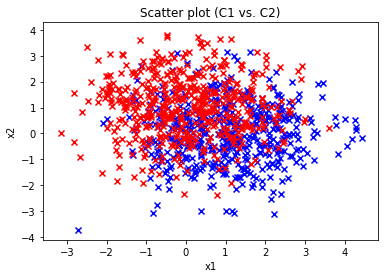

In [395]:
def generate_data(N) :
    if N%2 == 1 :
        N += 1
    dataset = np.zeros((N, 3), dtype="float32")
    for i, obs in enumerate(dataset):
        if i < N/2 :
            obs[:2] = np.random.multivariate_normal([0.0, 1.0], [[2.0**0.5, 0.0], [0.0, 2.0**0.5]])
            obs[2] = 1.0
        else :
            obs[:2] = np.random.multivariate_normal([1.0, 0.0], [[2.0**0.5, 0.0], [0.0, 2.0**0.5]])
            obs[2] = -1.0
    return dataset

def plot_data(dataset) :
    class1 = dataset[:, 2] == 1.0
    class0 = dataset[:, 2] == -1.0
    plt.scatter(dataset[class0][:, 0],dataset[class0][:, 1], color="blue", marker = 'x')
    plt.scatter(dataset[class1][:, 0],dataset[class1][:, 1], color="red", marker = 'x')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Scatter plot (C1 vs. C2)')
    plt.show()
    
plot_data(generate_data(1000))

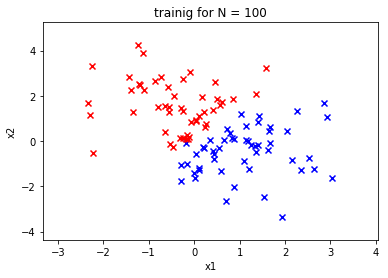

In [396]:
def get_training_data(N) :
    training_inputs = np.zeros((N,3), dtype="float32")
    training_set = generate_data(N)
    for i in range(N) :
        training_inputs[i] = [1, training_set[i][0], training_set[i][1]]
    labels = training_set[:, 2]
    return training_inputs, labels

def out(x, w) :
    return np.dot(x.T, w)

def getOutput(inputs, w) :
    output = []
    for i in range(len(inputs)) :
        output.append(out(inputs[i],w))
    output = np.array(output, dtype = "float32")
    return output

def compute_weights(input_vecs, labels) :
    X = input_vecs.T
    inv = la.inv(np.dot(X,X.T))
    prodX = np.dot(inv, X)
    return np.dot(prodX, labels)

def getError(y_vec, labels) :
    return 1.0/len(labels) * sum([((y_vec[i]) - labels[i]) ** 2 for i in range(len(labels))])

def train(input_vecs, labels) :
    weights = compute_weights(input_vecs, labels)
    y_vec = getOutput(input_vecs, weights)
    error = getError(y_vec, labels)
    return np.sign(y_vec), error, weights

train_data = get_training_data(100)
input_vecs = train_data[0]
labels = train_data[1]
res = train(input_vecs, labels)

def plot_classes(result, input_vecs, labels, N) :
    rclass1 = input_vecs[result==1]
    rclass0 = input_vecs[result==-1]
    plt.scatter(rclass0[:,1], rclass0[:,2], color = "blue", marker = 'x')
    plt.scatter(rclass1[:,1], rclass1[:,2], color = "red", marker = 'x')
    plt.axis([min(input_vecs[:,1]) - 1, max(input_vecs[:,1]) + 1, min(input_vecs[:,2]) - 1, max(input_vecs[:,2]) + 1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('trainig for N = %i' %N) 
    plt.show()
    
plot_classes(res[0], input_vecs, labels, 100)
    
def plot_test(result, input_vecs, N) :
    rclass1 = input_vecs[result==1]
    rclass0 = input_vecs[result==-1]
    plt.scatter(rclass0[:,1], rclass0[:,2], color = "blue", marker = 'x')
    plt.scatter(rclass1[:,1], rclass1[:,2], color = "red", marker = 'x')
    plt.axis([min(input_vecs[:,1]) - 1, max(input_vecs[:,1]) + 1, min(input_vecs[:,2]) - 1, max(input_vecs[:,2]) + 1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('test for N = %i' %N) 
    plt.show()

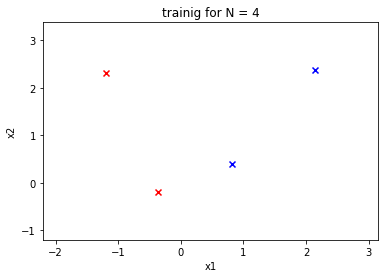

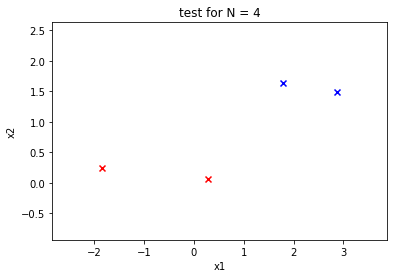

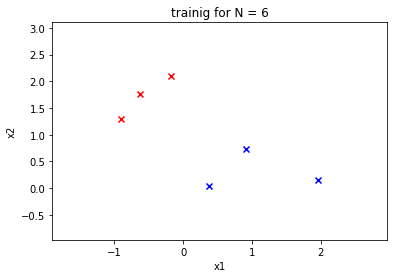

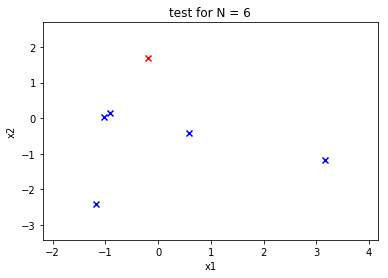

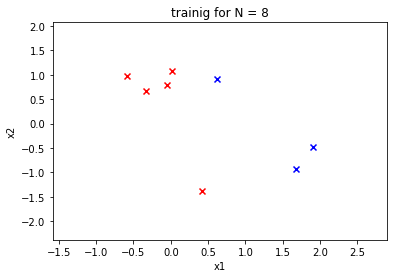

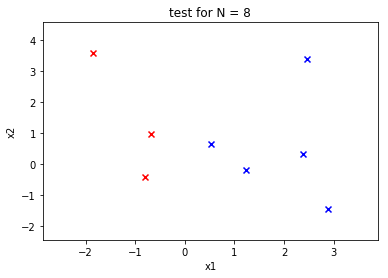

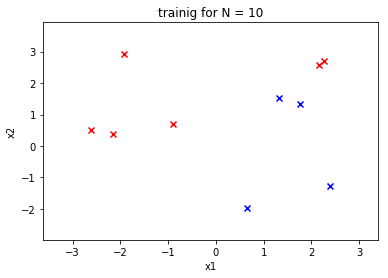

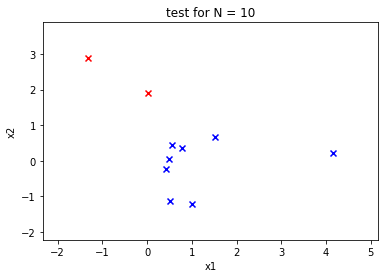

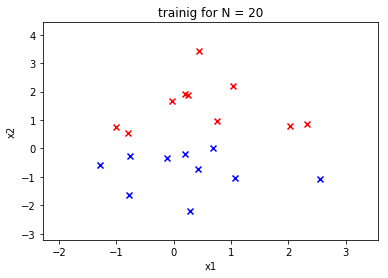

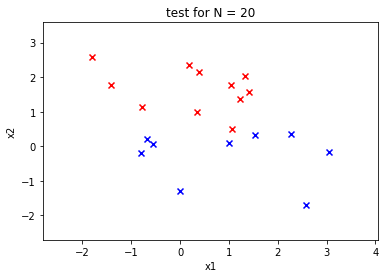

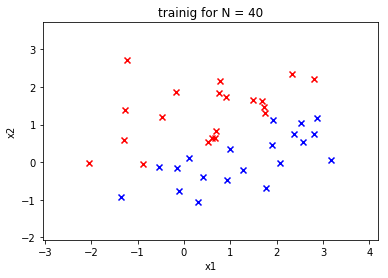

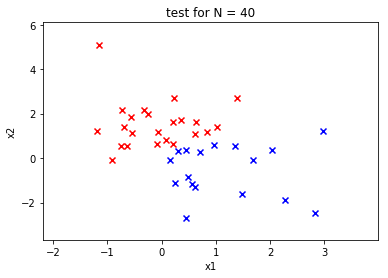

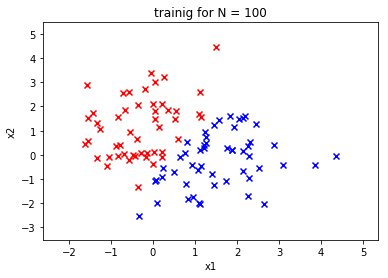

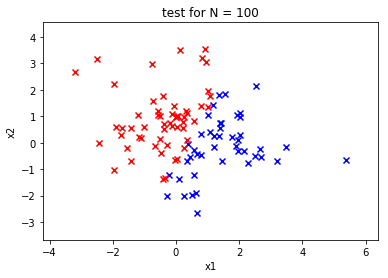

In [397]:
def percentage(results, labels) :
    s = 0.0
    for i in range(len(labels)) :
        if labels[i] == results[i] :
            s += 1.0
    return s/len(labels)

def calculate_accuracy(N) :  
    train_data = get_training_data(N)
    input_vecs = train_data[0]
    labels = train_data[1]
    res = train(input_vecs, labels)
    results = res[0]
    weights = res[2]
    plot_classes(results, input_vecs, labels, N)
    accuracy_train = percentage(results, labels)
    test_data = get_training_data(N)
    test_vecs = test_data[0]
    test_labels = test_data[1]
    test_res = np.sign(getOutput(test_vecs, weights))
    accuracy_test = percentage(test_res, test_labels)
    plot_test(test_res, test_vecs, N)
    return accuracy_train, accuracy_test, results, test_res,weights

N_list = [4, 6, 8, 10, 20, 40, 100]

accuracy_train = []
accuracy_test = []
sd_train_list = []
sd_test_list = []
weight_list = []
for N in N_list :
    acc = calculate_accuracy(N)
    sd_train = 0
    sd_test = 0
    for i in range(N) :
        sd_train += (acc[0]-acc[2][i]) ** 2
        sd_test += (acc[1]-acc[3][i]) ** 2
    sd_train_list.append((1.0/N * sd_train) ** 0.5-1)
    sd_test_list.append((1.0/N * sd_test) ** 0.5-1)
    accuracy_train.append(acc[0])
    accuracy_test.append(acc[1])
    weight_list.append(acc[-1])

[]

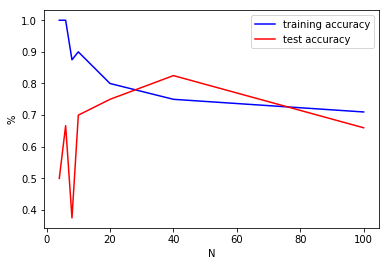

In [398]:
plt.plot(N_list, accuracy_train, color = 'blue', label = 'training accuracy')
plt.plot(N_list, accuracy_test, color = 'red', label = 'test accuracy')
#plt.axis([min(N_list),max(N_list),min(min(accuracy_train),min(accuracy_test)),max(max(accuracy_train,max(accuracy_test)))])
plt.legend(loc = 'best')
plt.xlabel('N')
plt.ylabel('%')
plt.plot()

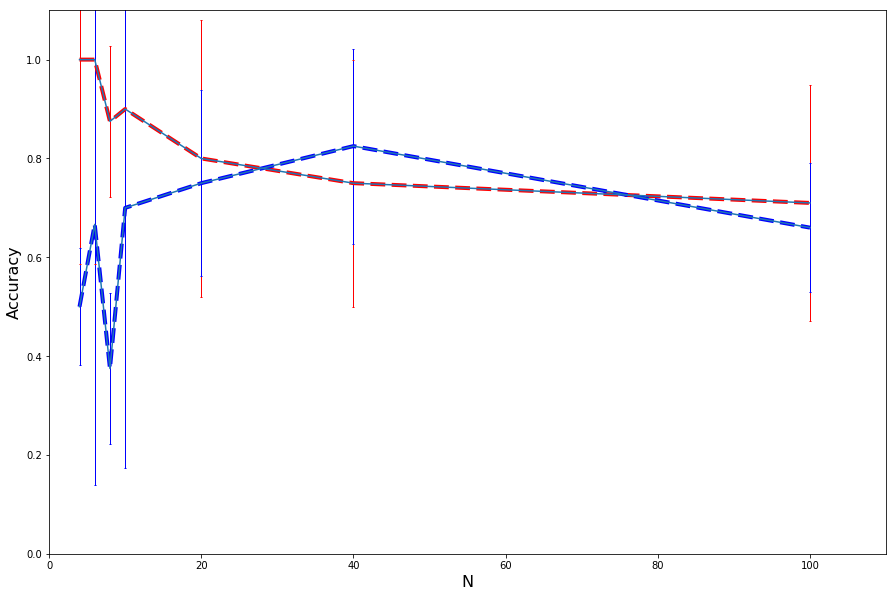

In [399]:
plt.gcf().clear()
#fig = plt.figure()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_xlabel('N', fontsize = 16)
ax.set_ylabel('Accuracy', fontsize = 16)

sd_train_list
ax.axis([0, 110, 0, 1.1])
ax.plot(N_list, accuracy_train, 'r--', linewidth = 4)
ax.errorbar(N_list, accuracy_train, yerr = sd_train_list, ecolor = 'r', elinewidth = 1, capsize = 1)
ax.plot(N_list, accuracy_test, 'b--', linewidth = 4)
ax.errorbar(N_list, accuracy_test, yerr = sd_test_list, ecolor = 'b', elinewidth = 1, capsize = 1)
plt.show()

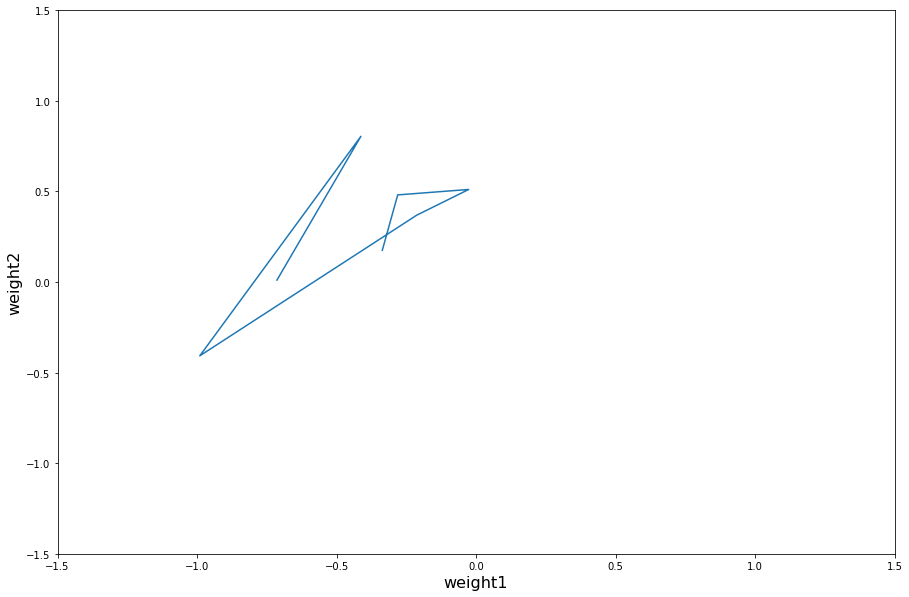

In [400]:
import pandas as pd

weight_df = pd.DataFrame(weight_list,columns = ['b','w1','w2'])

plt.gcf().clear()

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_xlabel('weight1', fontsize = 16)
ax.set_ylabel('weight2', fontsize = 16)

sd_train_list
ax.axis([-1.5, 1.5, -1.5, 1.5])
ax.plot(weight_df.w1, weight_df.w2 )





plt.show()


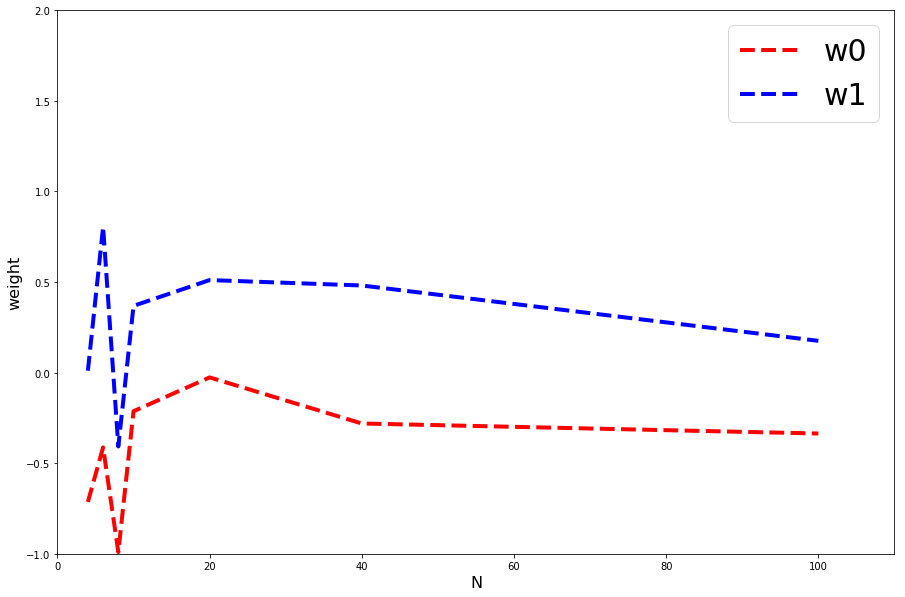

In [401]:
plt.gcf().clear()
#fig = plt.figure()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_xlabel('N', fontsize = 16)
ax.set_ylabel('weight', fontsize = 16)

sd_train_list
ax.axis([0, 110, -1, 2])
ax.plot(N_list, weight_df.w1, 'r--', linewidth = 4,label='w0')
ax.plot(N_list, weight_df.w2, 'b--', linewidth = 4,label='w1')
plt.legend(fontsize=30)

plt.show()


With more samples, we can minimize the training error and we can predict closer to a minimum for the generalization error.
With inifnite training samples, we approach certain optimal weights for EACH training set.
